In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

# Variables aleatorias discreta

## Suma de dos dados

Especifíquese la pmf

In [2]:
vals  = np.arange(2, 13)
probs = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36
print(vals)
print(probs)

[ 2  3  4  5  6  7  8  9 10 11 12]
[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


La suma de los valores de la pmf debe ser $1$, i.e.,
\begin{equation*}
\sum_{k \in [2, 12]} p_X(k) = 1
\end{equation*}

In [3]:
probs.sum()

1.0

Especifíquese la semilla del generador para reproducibilidad

In [4]:
npr.seed(0)

Genérese varias muestras de $X$

In [5]:
ns = 100
samples = npr.choice(vals, p=probs, size=ns)
print('Muestras = ', samples[:10])

Muestras =  [ 7  8  8  7  7  8  7 10 11  6]


### Histograma

Un histograma consiste en _intervalos_ de la variable aleatoria, y _cuentas_ del número de muestras en el intervalo

In [6]:
bc = np.arange(2, 14) - 0.5
print(bc)

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


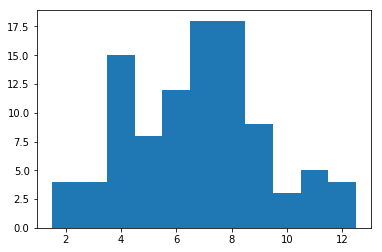

In [7]:
counts, bins, _ = plt.hist(samples, bins=bc)

In [8]:
print('Cuentas:\n', counts, '\n')
print('Intervalos:\n', bins)

Cuentas:
 [ 4.  4. 15.  8. 12. 18. 18.  9.  3.  5.  4.] 

Intervalos:
 [ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


### Función de masa de probabilidad (pmf)

Las cuentas en el histograma no corresponden a la pmf, pero la pmf se puede approximar usando las cuentas:  Para un valor $a$ en el intervalo $b$,

\begin{equation*}
p(a) \approx \frac{\text{cuenta}(b)}{n_\mathrm{s}}
\end{equation*}

<StemContainer object of 3 artists>

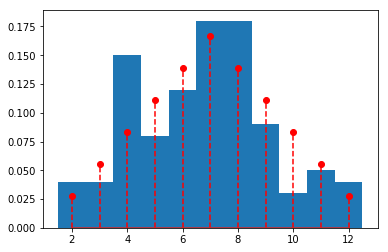

In [9]:
weights = np.ones_like(samples) / ns
plt.hist(samples, bins=bc, weights=weights)
plt.stem(vals, probs, markerfmt='ro', linefmt='r--')

Se puede ver que el histograma normalizado aproxima la pmf de $X$, aunque no muy bien.  La aproximación mejora si el número de muestras se aumenta.  Inténtelo!
- Cambie `ns` a el número que quiera (mayor a 100)
- Kernel > Restart Kernel and Clear All Outputs
- Ejecute hasta ésta celda

### Cuantiles y algunos estadísticos

Para calcular las propiedades de la distribución de $X$ podemos crear un objeto `rv_discrete` a partir de los valores de $X$ y su pmf:

In [10]:
sumdice = sps.rv_discrete(name='sumdice', values=(vals, probs))

In [11]:
print('Q(0.1) = ', sumdice.ppf(0.1))
print('Q(0.2) = ', sumdice.ppf(0.2))
print('Q(0.5) = ', sumdice.ppf(0.5))
print('Q(0.7) = ', sumdice.ppf(0.7))
print('Q(0.9) = ', sumdice.ppf(0.9))
print('Media = {:g}, Mediana = {:g}, Varianza = {:g}'.
      format(sumdice.mean(),
             sumdice.median(),
             sumdice.var()))

Q(0.1) =  4.0
Q(0.2) =  5.0
Q(0.5) =  7.0
Q(0.7) =  8.0
Q(0.9) =  10.0
Media = 7, Mediana = 7, Varianza = 5.83333


## Otras variables aleatorias contínuas

### Distribución binomial

Un _ensayo binomial_ es un conjunto de $n$ intentos aleatorios independientes con dos posibles resultados mutuamente excluyentes (éxito o fracaso), con probabilidad de éxito $\theta$ (y de fracaso $1 - \theta$), donde se está interesado en el número total de éxitos.

Considérese la variable aleatoria $Y$ definida como el número de éxitos, entonces, se dice que $Y \sim \operatorname{Binomial}(\theta, n)$ y la pmf es la distribución binomial
\begin{equation*}
p_Y(y) = \operatorname{Binomial}(y \mid \theta, n)
\end{equation*}
donde $\theta$ y $n$ son los parámetros de la distribución binomial.

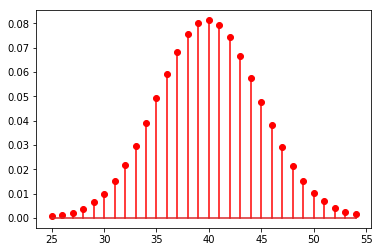

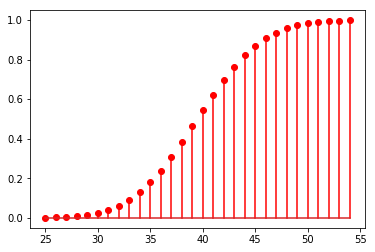

In [12]:
n = 100
q = 0.4
x = np.arange(sps.binom.ppf(0.001, n, q), sps.binom.ppf(0.999, n, q))
plt.stem(x, sps.binom.pmf(x, n, q) , markerfmt='ro', linefmt='r')
plt.show()
plt.stem(x, sps.binom.cdf(x, n, q) , markerfmt='ro', linefmt='r')
plt.show()

In [13]:
print('Q(0.1) = ', sps.binom.ppf(0.1, n, q))
print('Q(0.2) = ', sps.binom.ppf(0.2, n, q))
print('Q(0.5) = ', sps.binom.ppf(0.5, n, q))
print('Q(0.7) = ', sps.binom.ppf(0.7, n, q))
print('Q(0.9) = ', sps.binom.ppf(0.9, n, q))
print('Media = {:g}, Mediana = {:g}, Varianza = {:g}'.
      format(sps.binom.mean(n, q),
             sps.binom.median(n, q),
             sps.binom.var(n, q)))

Q(0.1) =  34.0
Q(0.2) =  36.0
Q(0.5) =  40.0
Q(0.7) =  43.0
Q(0.9) =  46.0
Media = 40, Mediana = 40, Varianza = 24


Intente cambiar los parámetros `n` y `q` para ver diferentes distribuciones binomiales

# Variable aleatoria contínua

## Variable normal estándar

\begin{equation*}
X \sim \mathcal{N}(0, 1)
\end{equation*}

Generemos algunas muestras de $X$:

In [14]:
n = 200
samples = npr.standard_normal(n)
print('Primeras 10 muestras = ', samples[:10])

Primeras 10 muestras =  [-1.16514984  0.90082649  0.46566244 -1.53624369  1.48825219  1.89588918
  1.17877957 -0.17992484 -1.07075262  1.05445173]


### Histogramas

Podemos calcular un histograma cumulativo, en el que el valor cumulativo para cada intervalo corresponde a la suma de la cuenta del intervalo y de todos los intervalos menores al intervalo en cuestión

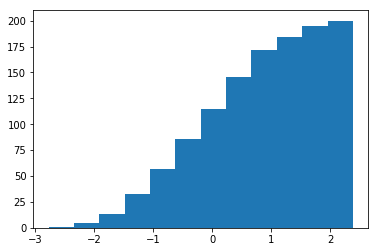

In [15]:
counts, bins, _ = plt.hist(samples, cumulative=True, bins='auto')

### Función de densidad cumulativa (cdf)

Dividiendo las cuentas por el número de muestras, obtenemos una aproximación de la cdf

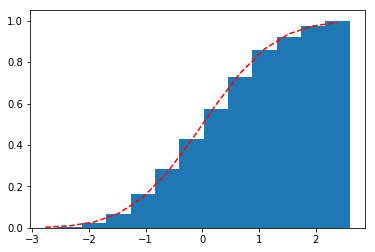

In [16]:
counts, bins, _ = plt.hist(samples, cumulative=True, bins='auto', density=True, align='right')
plt.plot(bins, sps.norm.cdf(bins), 'r--')

Se puede ver que el histograma dividido por el número de muestras aproxima la cdf

### Función de densidad de probabilidad (pdf)

Además del histograma acumulado también podemos calcular el histograma normal

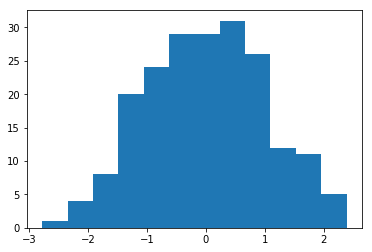

In [17]:
counts, bins, _ = plt.hist(samples, bins='auto')

La densidad $p_X(a)$ se puede aproximar en términos de las cuentas de los intervalos y la longitud de cada intervalo, $\Delta(\cdot)$.  Para el valor $a$ en el intervalo $b$,

\begin{equation*}
p_X(a) \approx \frac{\text{cuenta}(b)}{n_\mathrm{s} \Delta(b)}
\end{equation*}

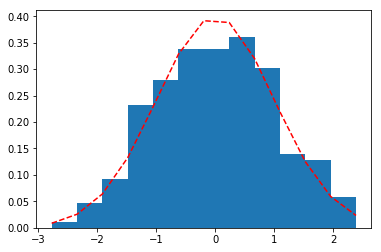

In [18]:
_, _, _ = plt.hist(samples, bins='auto', density=True)
plt.plot(bins, sps.norm.pdf(bins), 'r--')

Se puede ver que el histograma normalizado aproxima la pdf.  Una mejor aproximación puede obtenerse incrementando el número de muestras `n`.  Inténtelo!

### Cuantiles y estadísticos

In [19]:
print('Q(0.1) = ', sps.norm.ppf(0.1))
print('Q(0.2) = ', sps.norm.ppf(0.2))
print('Q(0.5) = ', sps.norm.ppf(0.5))
print('Q(0.7) = ', sps.norm.ppf(0.7))
print('Q(0.9) = ', sps.norm.ppf(0.9))
print('Media = {:g}, Mediana = {:g}, Varianza = {:g}'.
      format(sps.norm.mean(),
             sps.norm.median(),
             sps.norm.var()))

Q(0.1) =  -1.2815515655446004
Q(0.2) =  -0.8416212335729142
Q(0.5) =  0.0
Q(0.7) =  0.5244005127080407
Q(0.9) =  1.2815515655446004
Media = 0, Mediana = 0, Varianza = 1


La variable normal estándar tiene media $\mu = 0$ y varianza $\sigma^2 = 1$

## Otras variables aleatorias contínuas

### Variable aleatoria normal

La variable aleatoria normal $X$ tiene distribución completamente definida por su media $\mu$ y su desviación estándar $\sigma$.  La variable aleatoria se denota como $X \sim \mathcal{N}(\mu, \sigma)$ y su densidad se denota como $p_X(x) = \mathcal{N}(x \mid \mu, \sigma)$

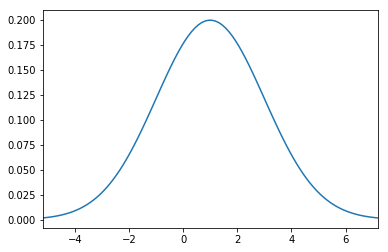

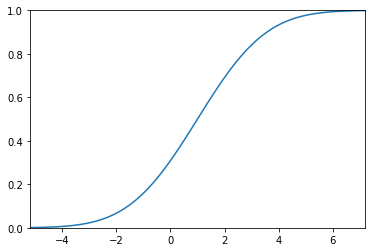

In [20]:
mean   = 1
stddev = 2
x = np.linspace(sps.norm.ppf(0.001, loc=mean, scale=stddev), sps.norm.ppf(0.999, loc=mean, scale=stddev), 100)
plt.plot(x, sps.norm.pdf(x, loc=mean, scale=stddev))
plt.xlim(np.min(x), np.max(x))
plt.show()
plt.plot(x, sps.norm.cdf(x, loc=mean, scale=stddev))
plt.xlim(np.min(x), np.max(x))
plt.ylim(0, 1)
plt.show()

In [21]:
print('Q(0.1) = ', sps.norm.ppf(0.1, loc=mean, scale=stddev))
print('Q(0.2) = ', sps.norm.ppf(0.2, loc=mean, scale=stddev))
print('Q(0.5) = ', sps.norm.ppf(0.5, loc=mean, scale=stddev))
print('Q(0.7) = ', sps.norm.ppf(0.7, loc=mean, scale=stddev))
print('Q(0.9) = ', sps.norm.ppf(0.9, loc=mean, scale=stddev))
print('Media = {:g}, Mediana = {:g}, Varianza = {:g}'.
      format(sps.norm.mean(loc=mean, scale=stddev),
             sps.norm.median(loc=mean, scale=stddev),
             sps.norm.var(loc=mean, scale=stddev)))

Q(0.1) =  -1.5631031310892007
Q(0.2) =  -0.6832424671458284
Q(0.5) =  1.0
Q(0.7) =  2.0488010254160813
Q(0.9) =  3.5631031310892007
Media = 1, Mediana = 1, Varianza = 4


Intente cambiar los parámetros `mean` y `stddev` para ver diferentes distribuciones binomiales